In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir("../")

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from generate_data import shift_image, get_object_mask, generate_data
from frame_converter import FrameConverter

In [3]:
car = cv2.imread("../data/car_bottom/car_bottom1.jpg")
bomb = cv2.imread("../data/bombs/c4_csgo.webp")

car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)
bomb = cv2.cvtColor(bomb, cv2.COLOR_BGR2RGB)

# car = cv2.cvtColor(car, cv2.COLOR_RGB2GRAY)
# bomb = cv2.cvtColor(bomb, cv2.COLOR_RGB2GRAY)

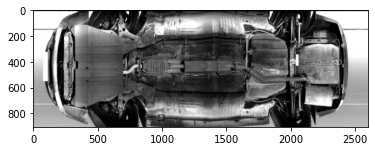

In [4]:
plt.imshow(car)

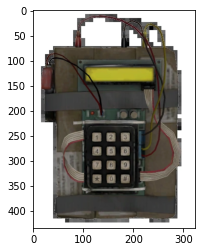

In [5]:
plt.imshow(bomb)

In [6]:
car = cv2.resize(car, (640, 640))
# bomb = cv2.resize(bomb, (64, 64))

In [7]:
bomb = cv2.resize(bomb, (64, 64))

In [34]:
bomb_x_coord, bomb_y_coord = np.random.randint(1, car.shape[0] - bomb.shape[0], size=2)
bomb_x_coord, bomb_y_coord

(229, 450)

In [37]:
generated_data = generate_data(
    car, bomb,
    obj1_freq=11, obj1_ampl=20,
    obj2_freq=21, obj2_ampl=10,
    obj2_coords=(bomb_x_coord, bomb_y_coord),
    time_step=1/30,
    generation_time=3
)

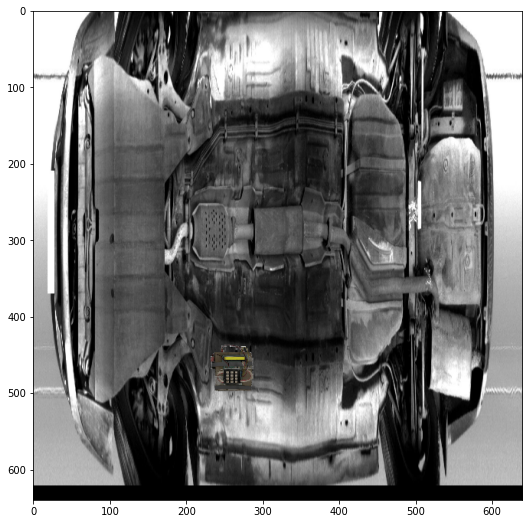

In [38]:
plt.figure(figsize=(16, 9))
plt.imshow(generated_data[2])
plt.show()

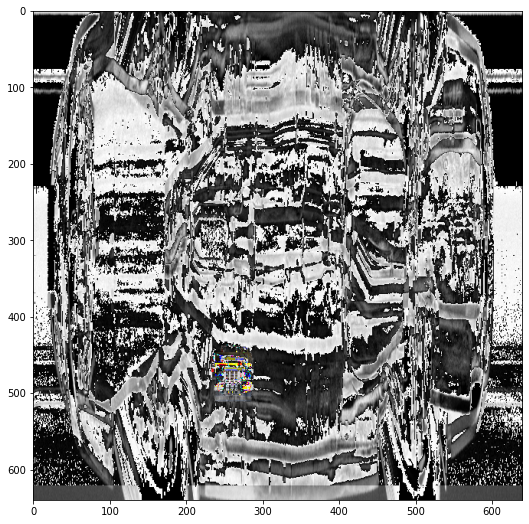

In [39]:
plt.figure(figsize=(16, 9))
plt.imshow(generated_data[2] - generated_data[0])
plt.show()

In [40]:
converter = FrameConverter("freq", epsilon=200)

In [43]:
converted_data = converter.convert(generated_data, step=6)

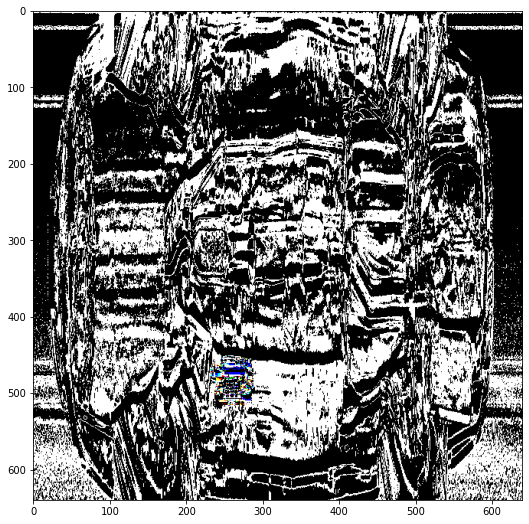

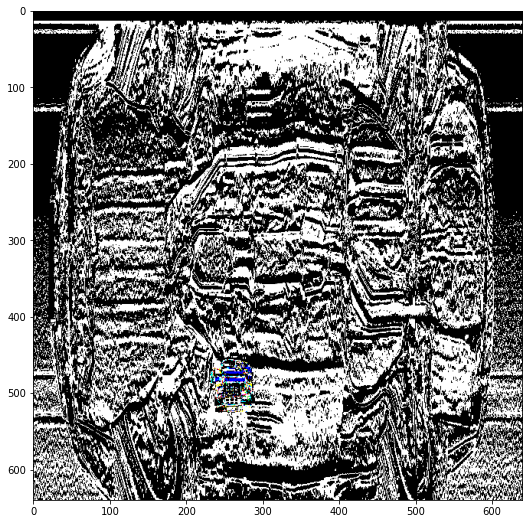

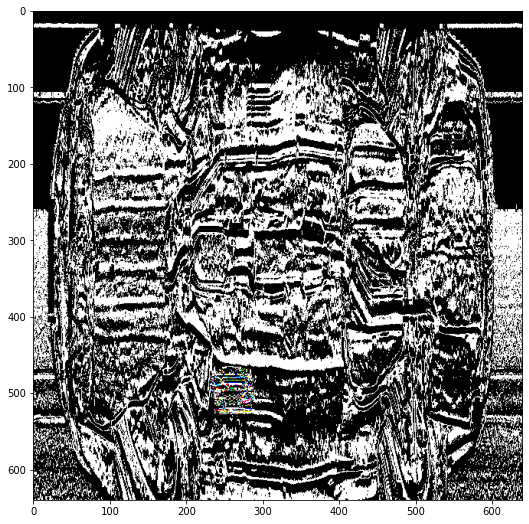

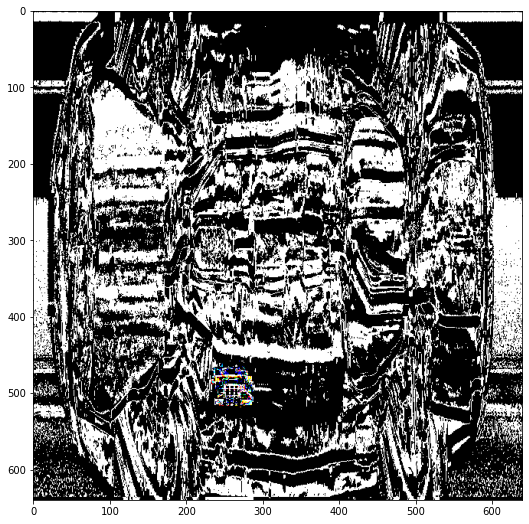

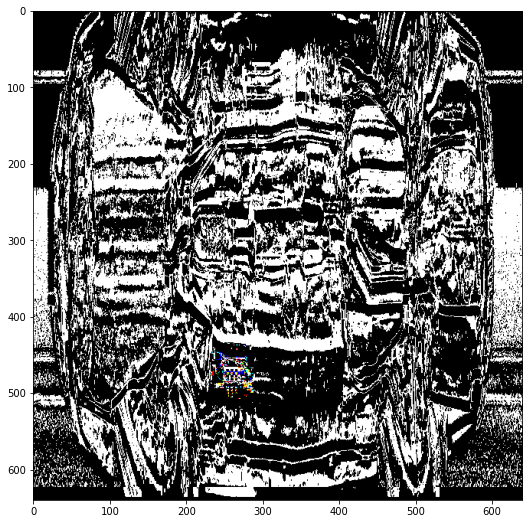

In [57]:
for img in converter.convert(generated_data, step=14)[:15]:
    plt.figure(figsize=(16, 9))
    plt.imshow(img)
    plt.show()

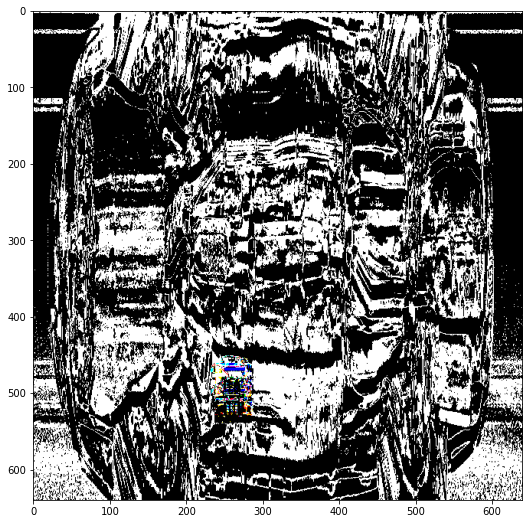

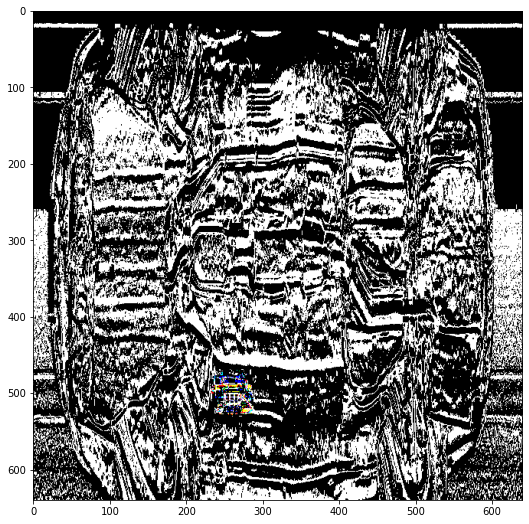

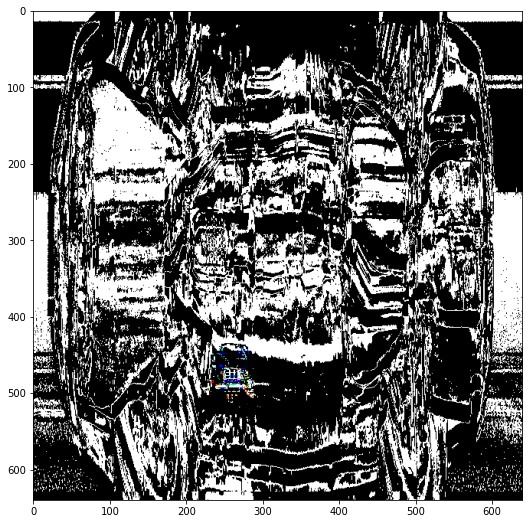

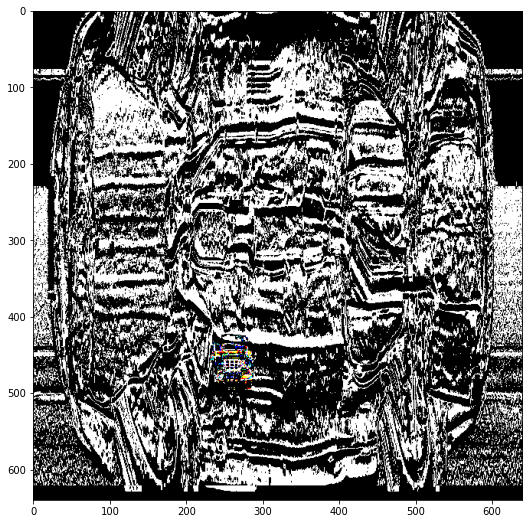

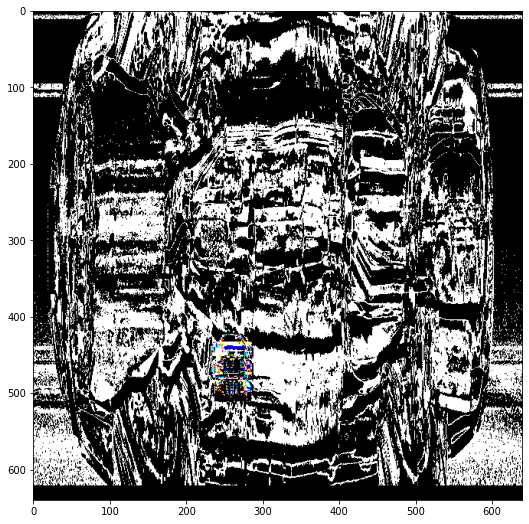

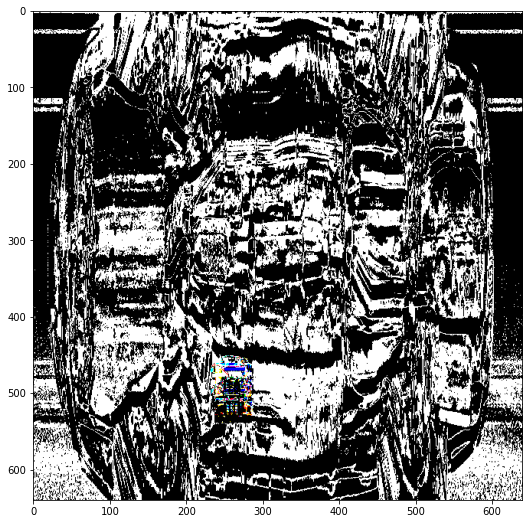

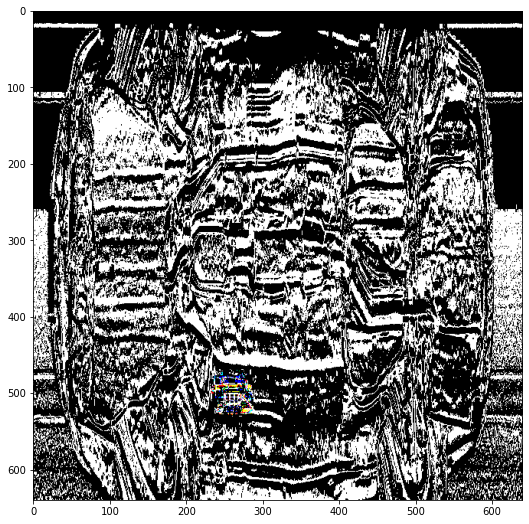

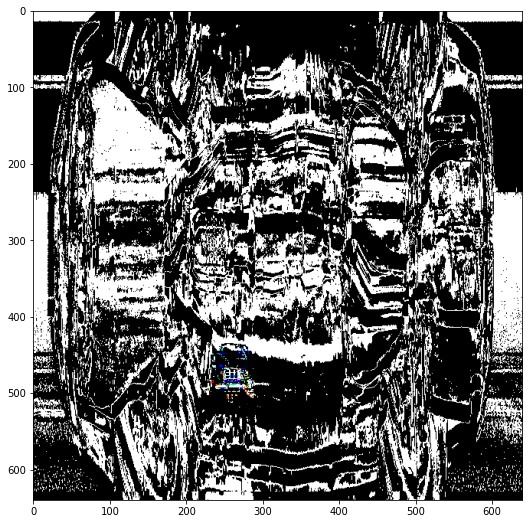

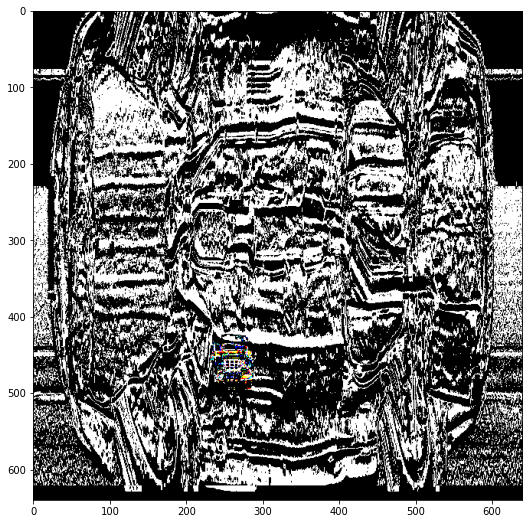

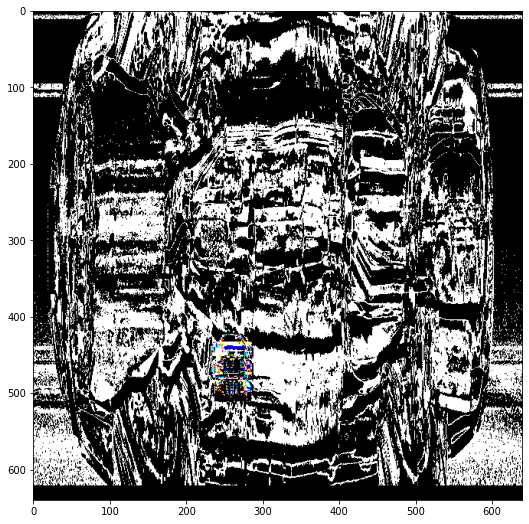

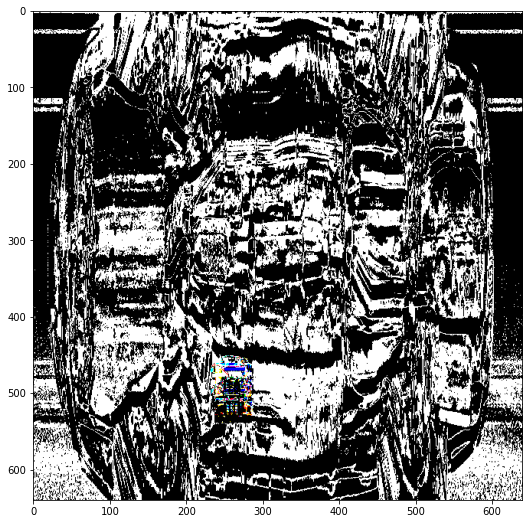

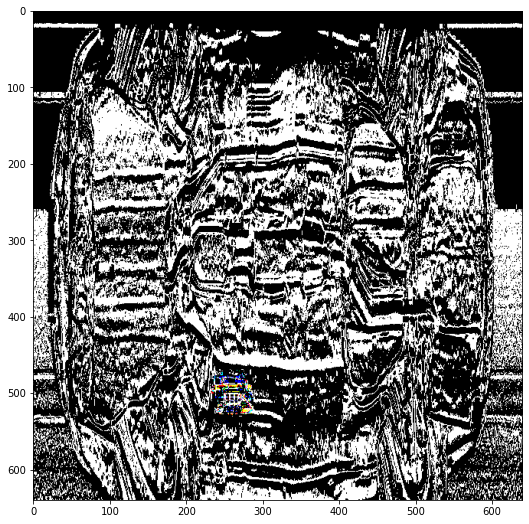

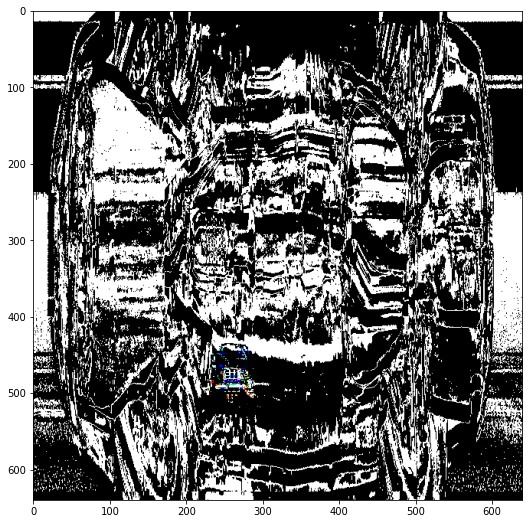

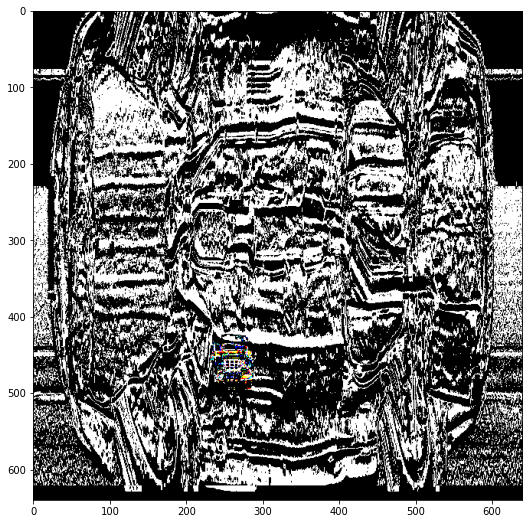

In [44]:
for i in range(len(converted_data[:15])):
    plt.figure(figsize=(16, 9))
    plt.imshow(converted_data[i])
    plt.show()